In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras import regularizers

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

import numpy as np
import scipy.misc

Using TensorFlow backend.
//anaconda/envs/tensorflow3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def generate_line_patch(label):
# your code here
    patch = np.zeros((3,3)) 
    if (label == 1):
        patch[:,1] = 1
    if (label == 0):
        patch[1,:] = 1
    patch = patch.flatten()
    return patch.flatten()

In [3]:
# generate training data

def generate_data(n_samples):
# your code here
    data_y = np.zeros((n_samples, 1))
    data_y[:n_samples/2] = 1
    np.random.shuffle(data_y)
    data_x = np.array([generate_line_patch(label) for label in data_y])
    return data_x, data_y

In [4]:
# create data train and test with 100 samples each
data_x_train, data_y_train = generate_data(100)
data_x_test, data_y_test = generate_data(100)

//anaconda/envs/tensorflow3/lib/python3.4/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [5]:
data_x_train[10].reshape(3,3)

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 0.,  0.,  0.]])

In [6]:
batch_size = 10
num_classes = 2
epochs = 50

In [12]:
# build a fully connected network with just one hidden layer, 10 units

# create an empty network model
model = Sequential()

# add input layer
model.add(Dense(10, activation='relu', input_shape=(9,), W_regularizer=regularizers.l1(0.01)))

# add hidden layer
# model.add(Dense(10, activation='relu'))

# add output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_3 (Dense)                  (None, 10)            100         dense_input_2[0][0]              
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 1)             11          dense_3[0][0]                    
Total params: 111
Trainable params: 111
Non-trainable params: 0
____________________________________________________________________________________________________


In [13]:
# compile the model
adam = Adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam)

In [14]:
# and train it
history = model.fit(data_x_train, data_y_train,
                   batch_size=batch_size,
                   nb_epoch=epochs,
                   verbose=0,
                   validation_data=(data_x_test, data_y_test))

score = model.evaluate(data_x_test, data_y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

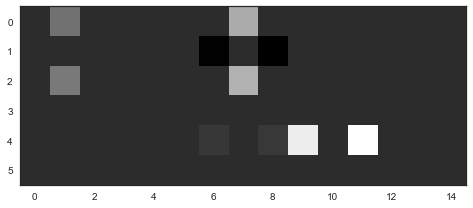

In [15]:
# visualize the filters
layer = model.layers[0]
weights = layer.get_weights()

filterTiles = np.array([])
index = 0
for i in range(5):
    filterRow = []
    for j in range(2):
        w = weights[0][:,index]
        w = w.reshape(3,3)
        filterRow.extend(w)
        index+=1
    filterRow = np.array(filterRow)
    if not filterTiles.shape[0] == 0:
        filterTiles = np.hstack([filterTiles, filterRow])
    else:
        filterTiles = filterRow

plt.imshow(filterTiles, cmap='gray')    
plt.show()
